Сейчас я попробую сделать нейронную сеть на признаках, которые я вытащила из текстов.


In [0]:
import numpy as np
import pandas as pd

import tensorflow as tf

from keras.models import Sequential
from keras.layers import Dense,Activation,Layer,Lambda

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.utils import class_weight
from sklearn.preprocessing import normalize


import keras
import matplotlib.pyplot as plt
from IPython.display import clear_output


In [0]:
dataset=pd.read_csv("gk4z_features.csv")

In [3]:
dataset.head()

,id,text,likes,label,len_char,punct,punct_count,punct%,tokens,tokens_count,tokens%,smiles,smiles_count,smiles%,numbers_count,numbers%,latin_count,latin%
0,76000,#конкурс@the4gkz \r\r\r\nДля вашего удобства с...,17,post,503,"#@.:•|-.—:./:./•|-.—/:./:://./|://./•|.—:./:.,!",47,0.093439,"['#', 'конкурс', '@', 'the4gkz', 'Для', 'вашег...",81,0.161034,NaN,0,0.000000,23,0.045726,116,0.230616
1,76914,Уже сегодня ночью (по МСК) начнётся один из са...,34,post,669,"()—.—()!..,!(),—(,).:://..//",28,0.041854,"['Уже', 'сегодня', 'ночью', '(', 'по', 'МСК', ...",111,0.165919,NaN,0,0.000000,0,0.000000,49,0.073244
2,76917,"Ого, Нина Кравиц в лайн-апе😲",0,comment,28,",-",2,0.071429,"['Ого', ',', 'Нина', 'Кравиц', 'в', 'лайн-апе😲']",6,0.214286,😲,1,0.035714,0,0.000000,0,0.000000
3,76920,"[id17823823|Анастасия], с новым крутым шоу от ...",0,comment_to_comment,56,"[|],",4,0.071429,"['[', 'id17823823|Анастасия', ']', ',', 'с', '...",11,0.196429,NaN,0,0.000000,8,0.142857,2,0.035714
4,76922,Скину расписание на сегодня сюда. Время москов...,0,comment,687,..:......&....:..........:......&.....,38,0.055313,"['Скину', 'расписание', 'на', 'сегодня', 'сюда...",112,0.163028,NaN,0,0.000000,127,0.184862,332,0.483261


In [4]:
dataset=dataset.drop(["id", "punct","smiles","tokens"],axis=1)
dataset.head()

,text,likes,label,len_char,punct_count,punct%,tokens_count,tokens%,smiles_count,smiles%,numbers_count,numbers%,latin_count,latin%
0,#конкурс@the4gkz \r\r\r\nДля вашего удобства с...,17,post,503,47,0.093439,81,0.161034,0,0.000000,23,0.045726,116,0.230616
1,Уже сегодня ночью (по МСК) начнётся один из са...,34,post,669,28,0.041854,111,0.165919,0,0.000000,0,0.000000,49,0.073244
2,"Ого, Нина Кравиц в лайн-апе😲",0,comment,28,2,0.071429,6,0.214286,1,0.035714,0,0.000000,0,0.000000
3,"[id17823823|Анастасия], с новым крутым шоу от ...",0,comment_to_comment,56,4,0.071429,11,0.196429,0,0.000000,8,0.142857,2,0.035714
4,Скину расписание на сегодня сюда. Время москов...,0,comment,687,38,0.055313,112,0.163028,0,0.000000,127,0.184862,332,0.483261


In [0]:
# заменяет строки на цифры
def mapping(data,feature):
    featureMap=dict()
    count=0
    for i in sorted(data[feature].unique(),reverse=True):
        featureMap[i]=count
        count=count+1
    data[feature]=data[feature].map(featureMap)
    return data

In [0]:
dataset=mapping(dataset,feature="label")

In [7]:
dataset.head(5)

,text,likes,label,len_char,punct_count,punct%,tokens_count,tokens%,smiles_count,smiles%,numbers_count,numbers%,latin_count,latin%
0,#конкурс@the4gkz \r\r\r\nДля вашего удобства с...,17,0,503,47,0.093439,81,0.161034,0,0.000000,23,0.045726,116,0.230616
1,Уже сегодня ночью (по МСК) начнётся один из са...,34,0,669,28,0.041854,111,0.165919,0,0.000000,0,0.000000,49,0.073244
2,"Ого, Нина Кравиц в лайн-апе😲",0,2,28,2,0.071429,6,0.214286,1,0.035714,0,0.000000,0,0.000000
3,"[id17823823|Анастасия], с новым крутым шоу от ...",0,1,56,4,0.071429,11,0.196429,0,0.000000,8,0.142857,2,0.035714
4,Скину расписание на сегодня сюда. Время москов...,0,2,687,38,0.055313,112,0.163028,0,0.000000,127,0.184862,332,0.483261


In [0]:
#divide dataset into x(input) and y(output)
X=dataset.drop(["label", 'text'],axis=1)
y=dataset["label"]

In [0]:
#divide dataset into training set and test set
trainX, testX, trainY, testY = train_test_split(X, y, random_state=20)


In [0]:
def getModel(arr):
    model=Sequential()
    for i in range(len(arr)):
        if i!=0 and i!=len(arr)-1:
            if i==1:
                model.add(Dense(arr[i],input_dim=arr[0], kernel_initializer='normal', activation='relu'))
            else:
                model.add(Dense(arr[i],activation='relu'))
    model.add(Dense(arr[-1], kernel_initializer='normal', activation=tf.nn.softmax))
    model.compile(optimizer='rmsprop', 
              loss='sparse_categorical_crossentropy',
              metrics=['sparse_categorical_accuracy'])
    return model
  
# Всё, что будет ниже, я пробовала делать с tf.train.AdamOptimizer() и optimizer='rmsprop', разницы в результатах не заметила
# Также пробовала ставить kernel_initializer='normal' и без него, разницы тоже не заметила
# Я бы еще что-нибудь попробовала, но просто не знаю, что можно менять, чтобы это было осмысленно

In [0]:

class PlotLosses(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.i = 0
        self.x = []
        self.losses = []
        self.val_losses = []
        
        self.fig = plt.figure()
        
        self.logs = []

    def on_epoch_end(self, epoch, logs={}):
        
        self.logs.append(logs)
        self.x.append(self.i)
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))
        self.i += 1
        
        clear_output(wait=True)
        plt.plot(self.x, self.losses, label="loss")
        plt.legend()
        plt.show();
        
plot_losses = PlotLosses()

In [0]:
def classif_report(current_model):
    predY=current_model.predict(testX) 
    new_ar = []
    for el in predY:
        new_ar.append(np.argmax(el))
    print(classification_report(testY, new_ar))

Сейчас я буду пробовать разное количество слоёв и нейронов в моделях, и разное количество эпох.

# 1

In [0]:
firstModel=getModel([12,50,3])

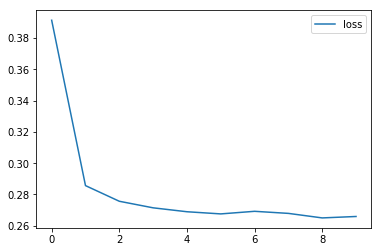

In [20]:

firstModel.fit(np.array(trainX),np.array(trainY),epochs=10, callbacks=[plot_losses]) 

In [21]:
classif_report(firstModel)

              precision    recall  f1-score   support

           0       0.97      0.95      0.96      3443
           1       0.33      0.02      0.04      1132
           2       0.87      0.98      0.92      8384

   micro avg       0.89      0.89      0.89     12959
   macro avg       0.72      0.65      0.64     12959
weighted avg       0.85      0.89      0.85     12959



Комменты к комментам не распознаются.

# 2

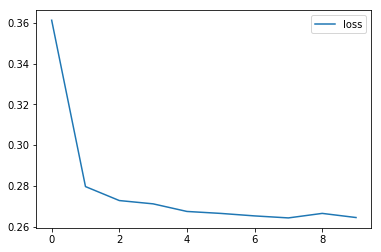

In [22]:
secondModel=getModel([12,50,50, 3])
secondModel.fit(np.array(trainX),np.array(trainY),epochs=10,callbacks=[plot_losses]) 

In [23]:
classif_report(secondModel)

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      3443
           1       0.39      0.11      0.17      1132
           2       0.88      0.96      0.92      8384

   micro avg       0.89      0.89      0.89     12959
   macro avg       0.74      0.68      0.68     12959
weighted avg       0.86      0.89      0.86     12959



# 3

In [0]:
thirdModel=getModel([12,50,70,40,3])

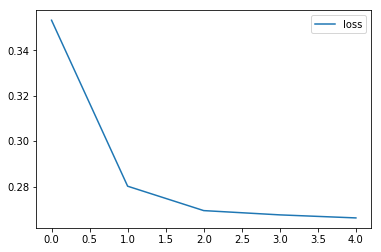

In [25]:
thirdModel.fit(np.array(trainX),np.array(trainY),epochs=5,callbacks=[plot_losses])

In [26]:
classif_report(thirdModel)

              precision    recall  f1-score   support

           0       0.98      0.93      0.95      3443
           1       0.36      0.00      0.01      1132
           2       0.86      0.99      0.92      8384

   micro avg       0.89      0.89      0.89     12959
   macro avg       0.73      0.64      0.63     12959
weighted avg       0.85      0.89      0.85     12959



От увеличения количества слоев ничего не улучшается. Попробую сделать много-много эпох)



# 4

In [0]:
forthModel=getModel([12,10,10, 3])

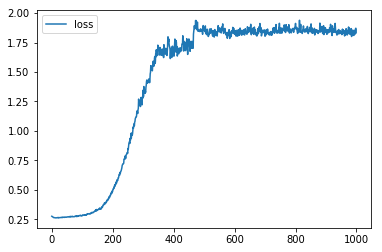

In [0]:
forthModel.fit(np.array(trainX),np.array(trainY), epochs=1000,callbacks=[plot_losses])


In [0]:
classif_report(forthModel)

              precision    recall  f1-score   support

           0       0.96      0.94      0.95      3443
           1       0.00      0.00      0.00      1132
           2       0.86      0.99      0.92      8384

   micro avg       0.89      0.89      0.89     12959
   macro avg       0.61      0.64      0.62     12959
weighted avg       0.81      0.89      0.85     12959



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Я попробовала разное количество слоев и нейронов, и разное количество эпох, но не заметила от них какого-то эффекта.

Попробую теперь веса.

## 5

In [0]:
fifthModel=getModel([12,50, 3])

In [0]:
class_weights = class_weight.compute_class_weight('balanced',
                                                 np.unique(trainY),
                                                 trainY)

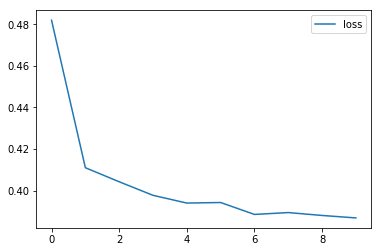

In [28]:
fifthModel.fit(np.array(trainX),np.array(trainY),epochs=10, class_weight = {0:1.27977484, 1:3.8534047 , 2:0.510438}, callbacks=[plot_losses])

In [29]:
classif_report(fifthModel)

              precision    recall  f1-score   support

           0       0.93      0.98      0.96      3443
           1       0.38      0.81      0.51      1132
           2       0.96      0.79      0.87      8384

   micro avg       0.84      0.84      0.84     12959
   macro avg       0.76      0.86      0.78     12959
weighted avg       0.90      0.84      0.86     12959



Вот так гораздо лучше!

Может, мне сначала нормализовать признаки?

## 6

In [0]:
normalized_X = normalize(X)
trainX_n, testX_n, trainY, testY = train_test_split(normalized_X, y, random_state=20)

In [0]:
sixthModel=getModel([12,50,50,3])

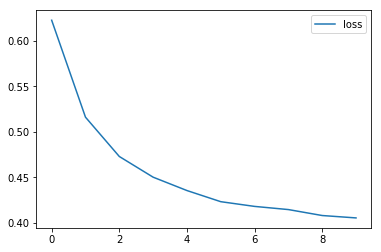

In [39]:
sixthModel.fit(np.array(trainX_n),np.array(trainY),epochs=10,class_weight = {0:1.27977484, 1:3.8534047 , 2:0.510438},callbacks=[plot_losses])

In [0]:
def classif_report_n(current_model):
    predY=current_model.predict(testX_n) 
    new_ar = []
    for el in predY:
        new_ar.append(np.argmax(el))
    print(classification_report(testY, new_ar))

In [40]:
classif_report_n(sixthModel)

              precision    recall  f1-score   support

           0       0.87      0.99      0.93      3443
           1       0.36      0.79      0.50      1132
           2       0.96      0.76      0.85      8384

   micro avg       0.82      0.82      0.82     12959
   macro avg       0.73      0.84      0.76     12959
weighted avg       0.89      0.82      0.84     12959



Результат как минимум не лучше, а пожалуй даже что и похуже.

Может, мне ограничить количество параметров?

## 7

In [0]:
# likes numbers_count latin_count
X_small = dataset.filter(items = ['likes', 'numbers_count', 'latin_count', 'numbers%', 'latin%'])
# X_small=dataset.drop(["label", 'text', 'len_char', 'tokens_count', 'smiles_count', 'smiles%', 'tokens%'],axis=1)

In [55]:
X_small.head()

,likes,numbers_count,latin_count,numbers%,latin%
0,17,23,116,0.045726,0.230616
1,34,0,49,0.000000,0.073244
2,0,0,0,0.000000,0.000000
3,0,8,2,0.142857,0.035714
4,0,127,332,0.184862,0.483261


In [0]:
trainX_small, testX_small, trainY_small, testY_small = train_test_split(X_small, y, random_state=20)


In [0]:
seventhModel=getModel([5, 10, 10, 3])

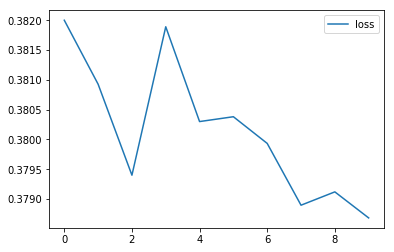

In [59]:
seventhModel.fit(np.array(trainX_small),np.array(trainY_small), class_weight = {0:1.27977484, 1:3.8534047 , 2:0.510438},epochs=20,callbacks=[plot_losses])

In [0]:
def classif_report_small(current_model):
    predY=current_model.predict(testX_small) 
    new_ar = []
    for el in predY:
        new_ar.append(np.argmax(el))
    print(classification_report(testY_small, new_ar))

In [60]:
classif_report_small(seventhModel)

              precision    recall  f1-score   support

           0       0.95      0.96      0.96      3443
           1       0.38      0.81      0.52      1132
           2       0.95      0.80      0.87      8384

   micro avg       0.85      0.85      0.85     12959
   macro avg       0.76      0.86      0.78     12959
weighted avg       0.90      0.85      0.86     12959



C уменьшением количества признаков результат лучше не стал, но в целом с весами классификация идет очень хорошо!